<a href="https://colab.research.google.com/github/armanA17siddique/Data-Science-Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

trader_data = pd.read_csv('historical_data(1).csv')
sentiment_data = pd.read_csv('fear_greed_index.csv')

trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])

trader_data['Date'] = trader_data['Timestamp IST'].dt.date
sentiment_data['Date'] = sentiment_data['date'].dt.date

merged_df = pd.merge(trader_data, sentiment_data, on='Date', how='inner')

print("Merged DataFrame Head:")
print(merged_df.head())

Merged DataFrame Head:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0

In [ ]:
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df['Size USD'] = pd.to_numeric(merged_df['Size USD'], errors='coerce')

In [ ]:
profitability_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
print("\nAverage Profitability by Sentiment:")
print(profitability_by_sentiment)


Average Profitability by Sentiment:
  classification  Closed PnL
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718


In [ ]:
if 'leverage' in merged_df.columns:
    leverage_by_sentiment = merged_df.groupby('classification')['leverage'].mean().reset_index()
    print("\nAverage Leverage by Sentiment:")
    print(leverage_by_sentiment)
else:
    print("\n'leverage' column not found. Skipping leverage analysis.")


'leverage' column not found. Skipping leverage analysis.


In [ ]:
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].sum().reset_index()
print("\nTotal Trading Volume by Sentiment:")
print(volume_by_sentiment)


Total Trading Volume by Sentiment:
  classification      Size USD
0   Extreme Fear  1.144843e+08
1  Extreme Greed  1.244652e+08
2           Fear  4.833248e+08
3          Greed  2.885825e+08
4        Neutral  1.802421e+08


In [ ]:
import matplotlib.pyplot as plt
import os

In [ ]:
if not os.path.exists('outputs'):
    os.makedirs('outputs')

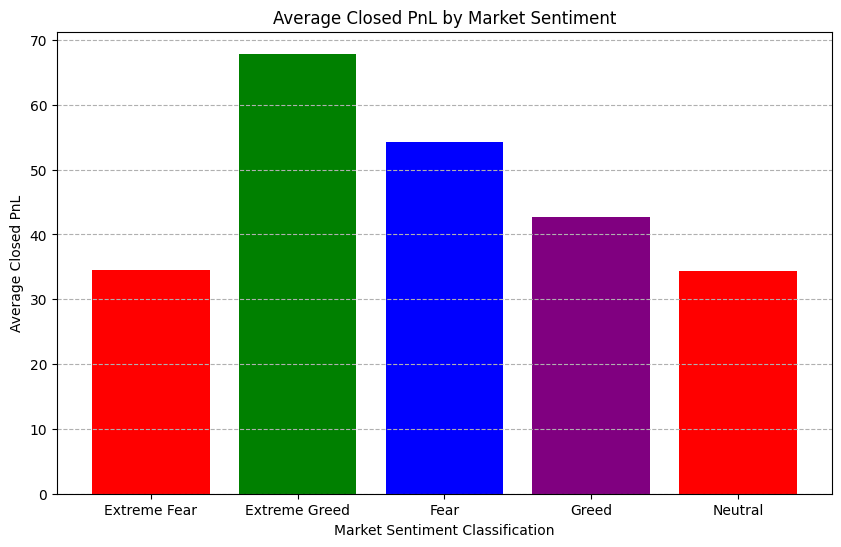

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(profitability_by_sentiment['classification'], profitability_by_sentiment['Closed PnL'], color=['red', 'green', 'blue', 'purple'])
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--')
plt.savefig('outputs/profitability_by_sentiment.png')
plt.show()

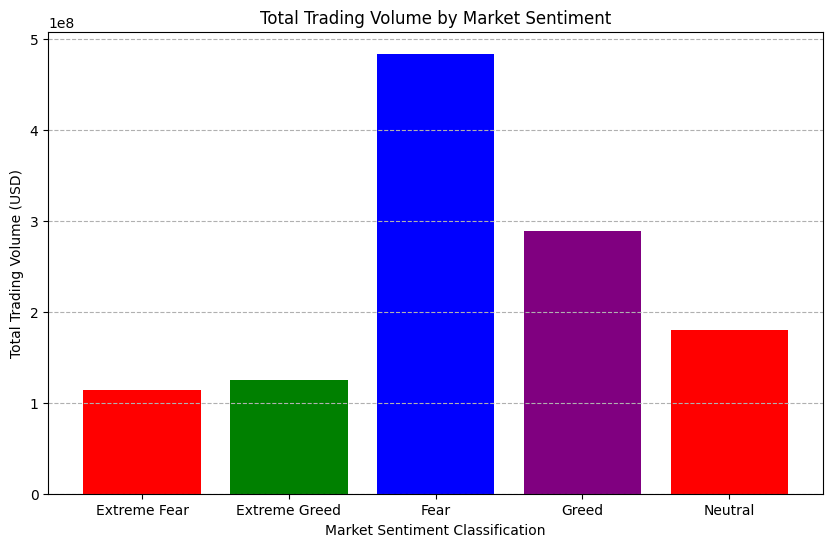

In [ ]:
# Plot 2: Bar chart of total trading volume
plt.figure(figsize=(10, 6))
plt.bar(volume_by_sentiment['classification'], volume_by_sentiment['Size USD'], color=['red', 'green', 'blue', 'purple'])
plt.title('Total Trading Volume by Market Sentiment')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Total Trading Volume (USD)')
plt.grid(axis='y', linestyle='--')
plt.savefig('outputs/volume_by_sentiment.png')
plt.show()

